### Setup and Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Set the base path
base = os.path.dirname(os.path.abspath("__file__"))

# The function to load data from folders and CSV files
def load_data(base_path, csv_path):
    csv_path = base + csv_path
    data = pd.read_csv(csv_path)
    images = []
    labels = []
    
    # Load images and labels
    for _, row in data.iterrows():
        image_path = os.path.join(base_path, row['Path'])
        image = Image.open(image_path)
        image = image.resize((32, 32))
        image = img_to_array(image)
        images.append(image)
        labels.append(row['ClassId'])
    images = np.array(images, dtype='float32')
    labels = np.array(labels)
    return images, labels

# Load training and test data from folders and CSV files
train_path = 'datasets/'
test_path = 'datasets/'
train_csv = '/datasets/Train.csv'
test_csv = '/datasets/Test.csv'

# Load data and preprocess
X_train, y_train = load_data(train_path, train_csv)
X_test, y_test = load_data(test_path, test_csv)

# Normalize the images and one-hot encode the labels
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

### Visualize Sample Images

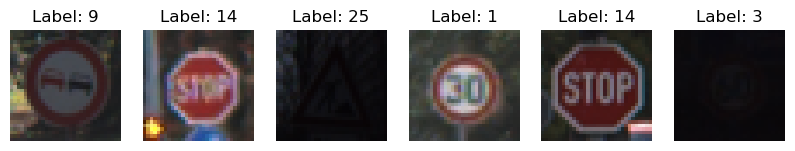

In [2]:
import matplotlib.pyplot as plt

# Visualize sample images from the dataset
def show_sample_images(images, labels, num_samples=6):
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False)
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[idx])
        ax.set_title(f'Label: {np.argmax(labels[idx])}')
        ax.axis('off')
    plt.show()

show_sample_images(X_train, y_train)

### Build the Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import BatchNormalization

# Build the model architecture
model = Sequential([
    Input(shape=(32, 32, 3)), # Input layer to explicitly specify input shape
    Conv2D(32, (3, 3), activation='relu'), # Convolutional layer with 32 filters and 3x3 kernel
    BatchNormalization(), # Batch normalization layer
    MaxPooling2D(2, 2), # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'), # Convolutional layer with 64 filters and 3x3 kernel
    BatchNormalization(), # Batch normalization layer
    MaxPooling2D(2, 2), # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'), # Convolutional layer with 128 filters and 3x3 kernel
    BatchNormalization(), # Batch normalization layer
    Flatten(), # Flatten layer to convert 3D data to 1D
    Dense(512, activation='relu'), # Fully connected layer with 512 units
    Dropout(0.5), # Dropout layer with 0.5 dropout rate
    BatchNormalization(), # Batch normalization layer
    Dense(43, activation='softmax') # Output layer with 43 units and softmax activation
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [4]:
# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.7846 - loss: 0.8389 - val_accuracy: 0.9323 - val_loss: 0.2219
Epoch 2/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9847 - loss: 0.0550 - val_accuracy: 0.9196 - val_loss: 0.2790
Epoch 3/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9868 - loss: 0.0436 - val_accuracy: 0.9631 - val_loss: 0.1290
Epoch 4/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.9428 - val_loss: 0.1855
Epoch 5/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9593 - val_loss: 0.1347
Epoch 6/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9304 - val_loss: 0.2859
Epoch 7/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9918 - loss: 0.0286 - val_accuracy: 0.9537 - val_loss: 0.1818
Epoch 8/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9939 -

### Plot Training History

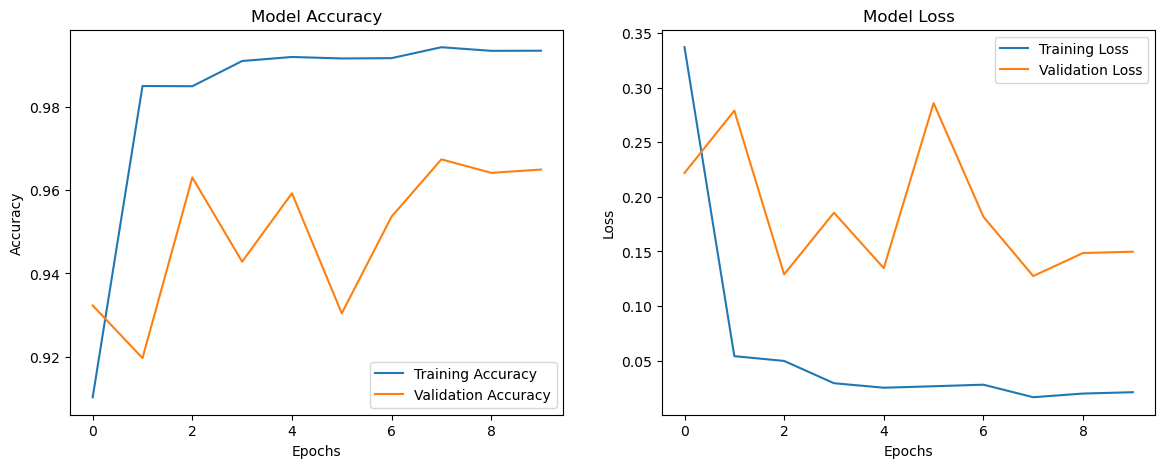

In [5]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

### Save the Trained Model

In [6]:
model.save('build/traffic_sign_model3.keras')

### Plot Confusion Matrix

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


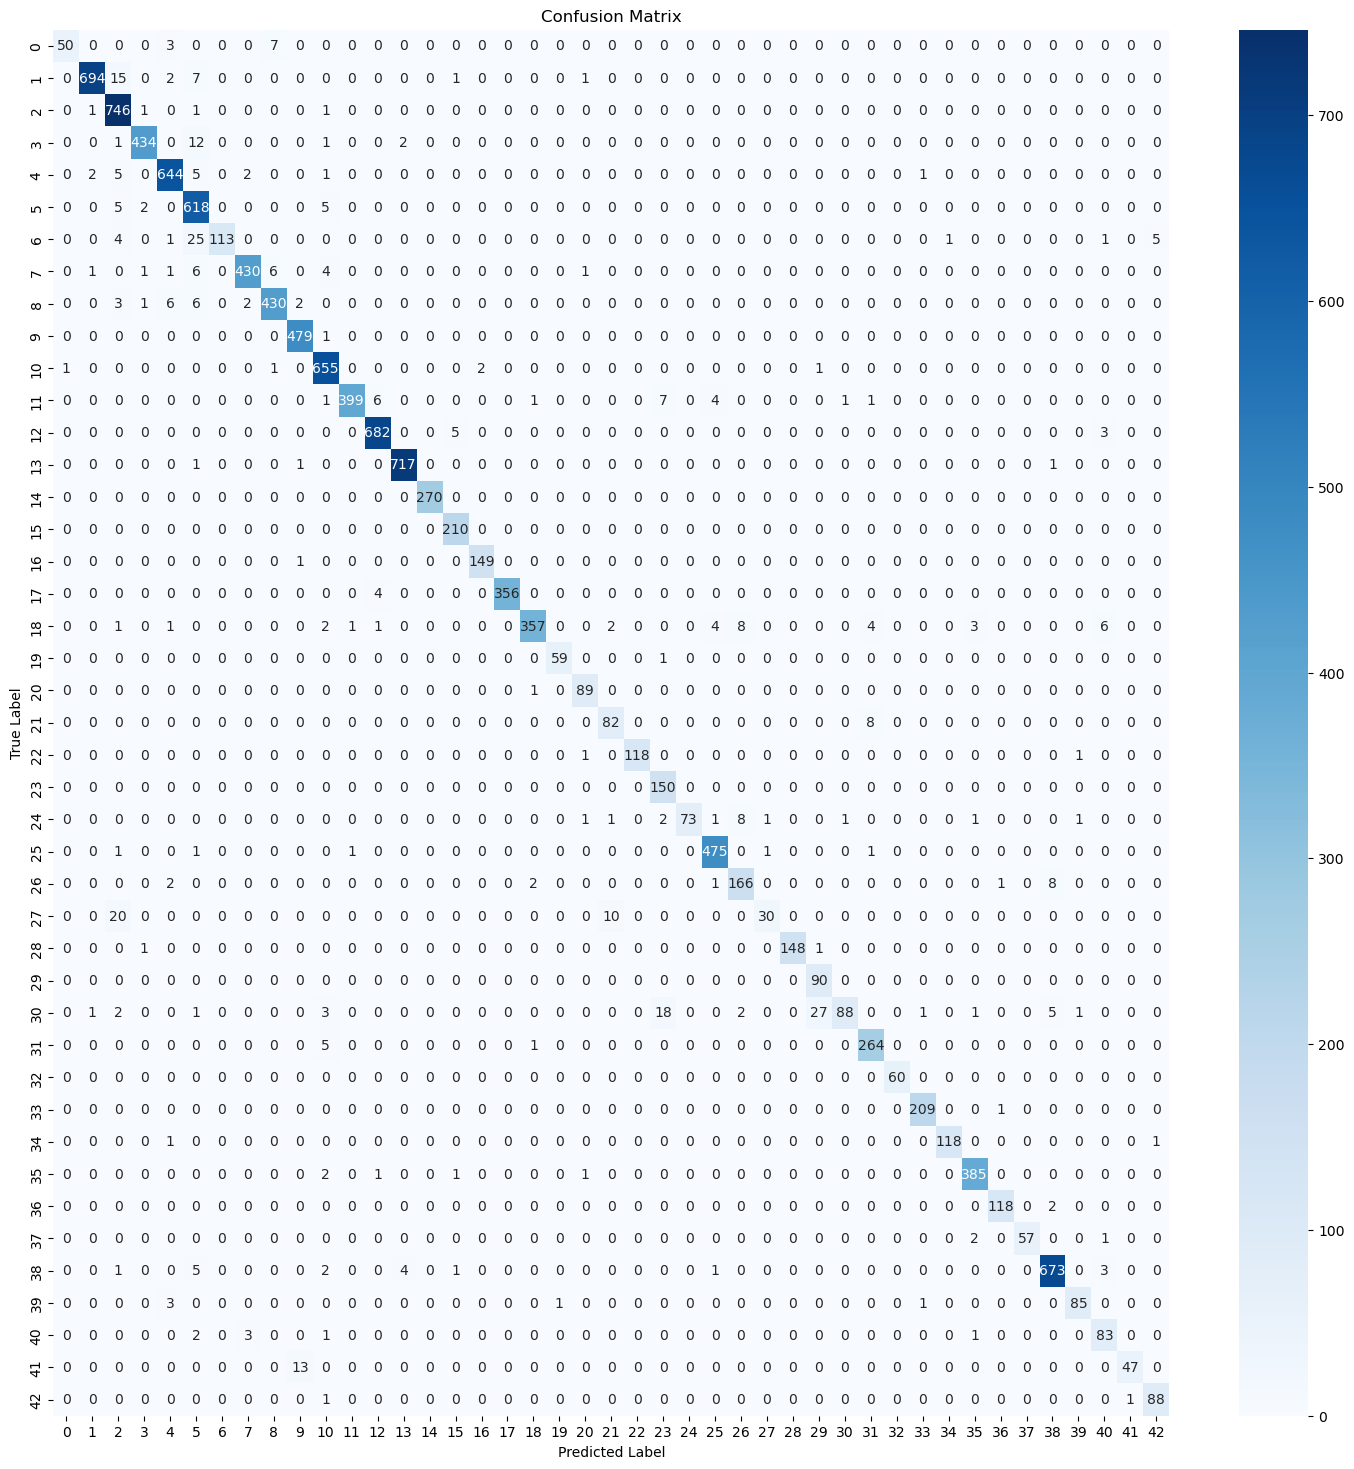

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(18, 18))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_true, y_pred_classes, classes=np.arange(43))

In [11]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_true, y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        60
           1       0.99      0.96      0.98       720
           2       0.93      0.99      0.96       750
           3       0.99      0.96      0.98       450
           4       0.97      0.98      0.97       660
           5       0.90      0.98      0.94       630
           6       1.00      0.75      0.86       150
           7       0.98      0.96      0.97       450
           8       0.97      0.96      0.96       450
           9       0.97      1.00      0.98       480
          10       0.96      0.99      0.97       660
          11       1.00      0.95      0.97       420
          12       0.98      0.99      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

### Plot Feature Maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


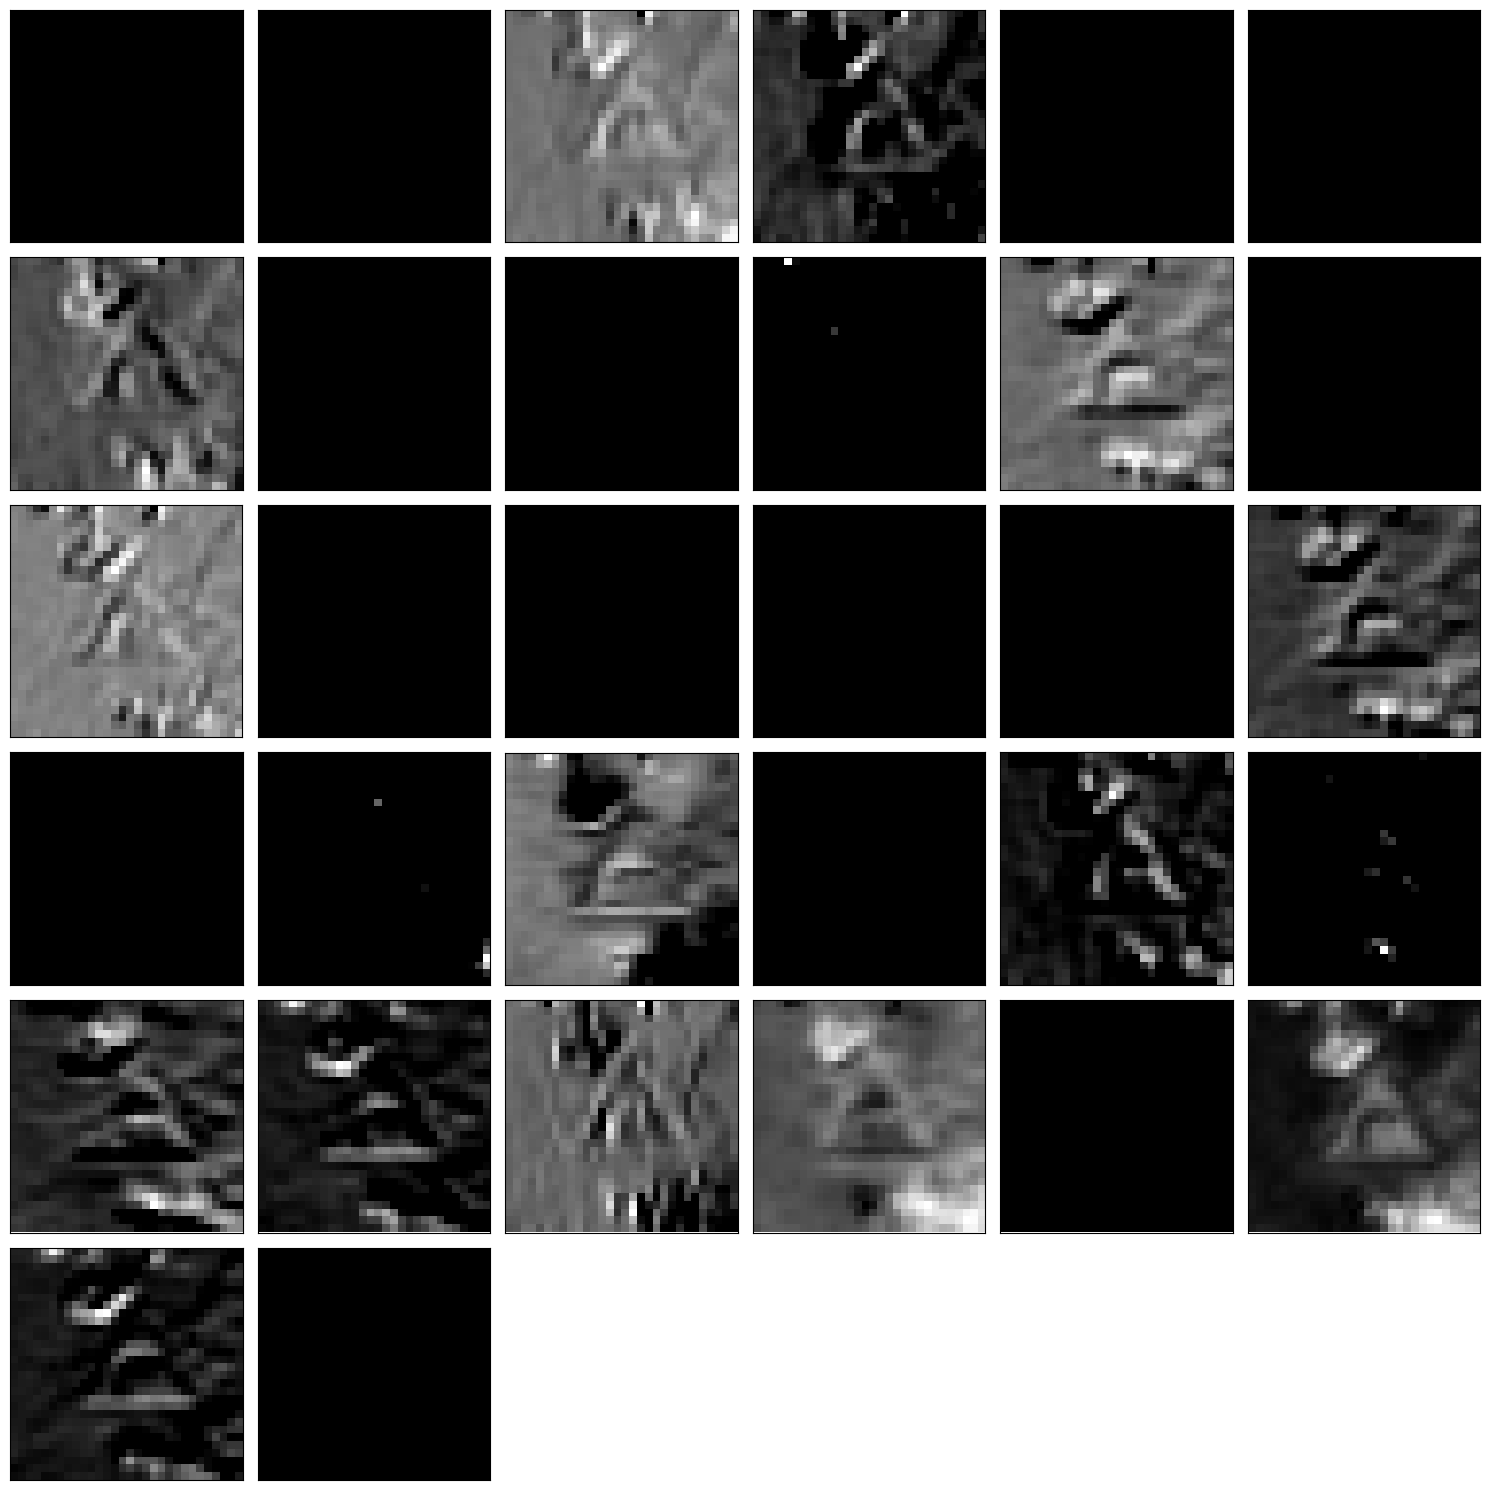

In [8]:
from tensorflow.keras.models import Model

# Plot feature maps
def plot_feature_maps(model, layer_id, image_input):
    model = Model(inputs=model.inputs, outputs=model.layers[layer_id].output)
    feature_maps = model.predict(image_input)
    num_maps = feature_maps.shape[-1]
    square = int(np.sqrt(num_maps)) + 1

    plt.figure(figsize=(15, 15))
    for i in range(1, num_maps + 1):
        ax = plt.subplot(square, square, i)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, i - 1], cmap='gray')
    plt.tight_layout()
    plt.show()

image_input = np.expand_dims(X_train[0], axis=0)
plot_feature_maps(model, layer_id=1, image_input=image_input)

### Plot Filters

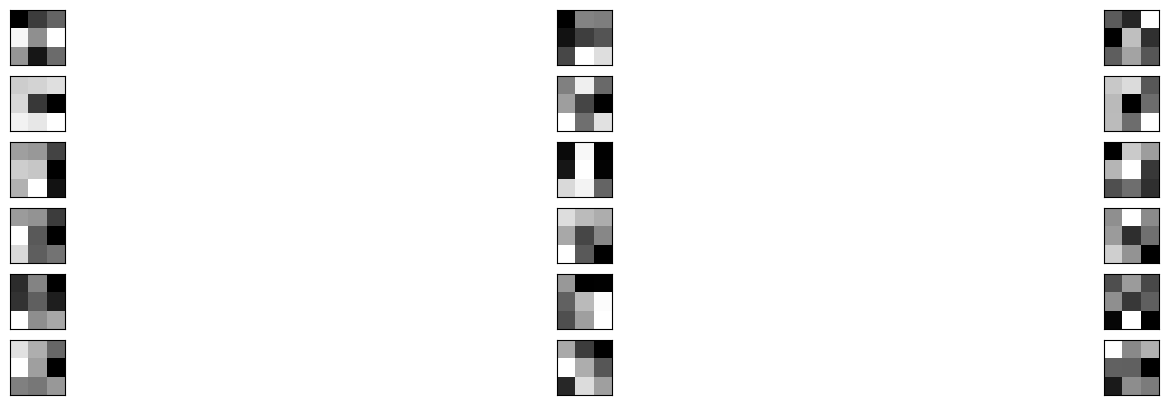

In [9]:
# Plot filters
def plot_filters(layer):
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters, ix = 6, 1
    plt.figure(figsize=(20, 5))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    plt.show()

plot_filters(model.layers[0])

### Evaluate the Model on Test Data

In [10]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the model
model_path = 'build/traffic_sign_model3.keras'
model = load_model(model_path)

# Load the CSV file
data_df = pd.read_csv('datasets/Test.csv')
num_classes = 43
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate test data
def generate_data(dataframe, batch_size):
    while True:
        for i in range(0, len(dataframe), batch_size):
            batch_data = dataframe.iloc[i:i+batch_size]
            images = []
            labels = []
            for _, row in batch_data.iterrows():
                img_path = 'datasets/' + row['Path']
                img = image.load_img(img_path, target_size=(32, 32))
                img = image.img_to_array(img)
                img = test_datagen.standardize(img)
                images.append(img)
                labels.append(to_categorical(row['ClassId'], num_classes=num_classes))
            images = np.array(images)
            labels = np.array(labels)
            yield images, labels

test_generator = generate_data(data_df, batch_size=32)

# Evaluate the model
steps = len(data_df) // 32
loss, accuracy = model.evaluate(test_generator, steps=steps)
print(f'Test Accuracy: {accuracy*100:.2f}%')

394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9537 - loss: 0.1963
Test Accuracy: 95.63%
